# Wealth and Democracy: Plotting, Part 2

In these expercises, we will be working with country-year level data from the World Development Indicators (published by the World Bank) to understand the relationship between wealth and democratic institutions.

This WDI data includes both countries' GDP per capita (a measure of wealth) and [Polity IV scores](https://en.wikipedia.org/wiki/Polity_data_series) (a measure of how democratic a country is -- countries with higher scores are liberal democracies countries with low scores are autocratic). 

Note by "liberal," we mean [reflecting the values of traditional liberalism](https://en.wikipedia.org/wiki/Liberalism) with a small-`l`, not Liberal in the sense of being associated with the US Democratic party.


### Exercise 1

Load the World Development Indicator data from [here.](https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/world-small.csv)

In [71]:

import pandas as pd
import seaborn.objects as so
import statsmodels.formula.api as smf
import numpy as np
import warnings
import seaborn.objects as so
import seaborn_objects_recipes as sor

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('mode.copy_on_write', True)

# Load the data
url = "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/world-small.csv"
wdi = pd.read_csv(url)
wdi

,country,region,gdppcap08,polityIV
0,Albania,C&E Europe,7715,17.8
1,Algeria,Africa,8033,10.0
2,Angola,Africa,5899,8.0
3,Argentina,S. America,14333,18.0
4,Armenia,C&E Europe,6070,15.0
...,...,...,...,...
140,Venezuela,S. America,12804,16.0
141,Vietnam,Asia-Pacific,2785,3.0
142,Yemen,Middle East,2400,8.0
143,Zambia,Africa,1356,15.0


### Exercise 2

Let's begin analyzing this data by estimating a simple linear model ("ordinary least squares") of the relationship between democracy scores (`polityIV`) and GDP per capita (`gdppcap08`). Polity Scores are the outcome we care about, so make it the dependent variable in your model. We will do so using the `statsmodel` package, which we'll discuss in detail later is this course. For the moment, just use this code:

```python
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())
```


In [72]:

results = smf.ols('polityIV ~ gdppcap08', data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00915
Time:                        10:38:46   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Exercise 3

Based on the results of this analysis, what would you conclude about the relationship between `gdppcap08` and `polityIV`? 

Write down your conclusions. 

My conclusion is that wealthier countries seem to have higher democracy scores. As GDP per capita increases, the Polity IV democracy score tends to increase as well.  It can be said that some wealthy countries have low democracy scores, and some poorer countries then to have high democracy scores, indicating that wealth alone does not determine democratic governance. In any additional dollar increase in GDP per capita, the democracy score increases by the coefficient value points on the Polity IV scale.

### Exercise 4

Now let's plot the relationship you just estimated statistically. First, use `seaborn.objects` to create a scatter plot of `polityIV` and `gdppcap08`. Include a title and label your axes (with formatted words, not variable names).

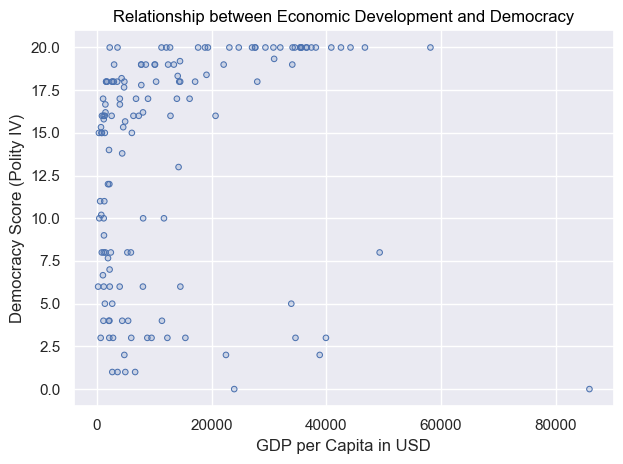

In [73]:
p = (
    so.Plot(wdi, x="gdppcap08", y="polityIV")
      .add(so.Dots())
      .label(title="Relationship between Economic Development and Democracy", x="GDP per Capita in USD", y="Democracy Score (Polity IV)")
)
p.show()

### Exercise 5

Now overlay a linear regression (*not* a higher order polynomial, just linear) fit to the scatter plot.

Note: linear regression is *not* symmetric — regressing Polity IV on GDP per Capita does not give the same result as regressing GDP per Capita on Polity IV. That's because linear regression is designed to minimize the sum of squared errors between predicted values of the y-variable and the true values of the y-variable, so the y-variable is, in a sense, privileged. 

Given that, for consistency be sure you make your plot reflect the regression you ran above.

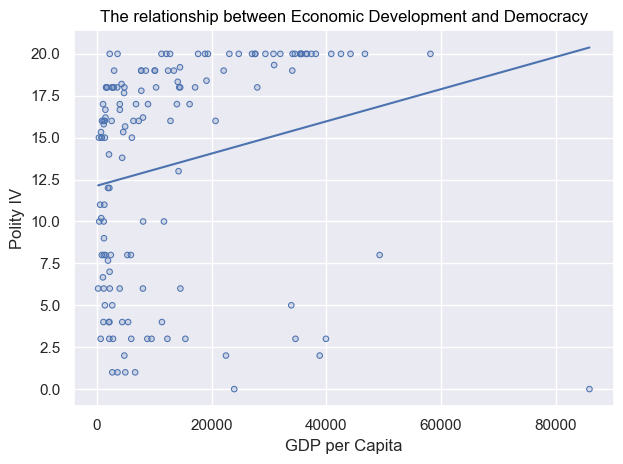

In [74]:
p = (
    so.Plot(wdi, x="gdppcap08", y="polityIV")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(order=1))  
    .label(
        title="The relationship between Economic Development and Democracy",
        x="GDP per Capita",
        y="Polity IV"
    )
)
p.show()


### Exercise 6

Does it seem like the linear model you estimated fits the data well?

I dont think the linear model estimated fit the data particularly well. It captures a general trend but fits poorly for prediction purposes.



### Exercise 7

Linear models impose a very strict functional form on the model they use: they try to draw a straight line through the data, no matter what. 

Can you think of a (mathematical) transformation for your data that would make the data a little more sane?

Apply the transformation.

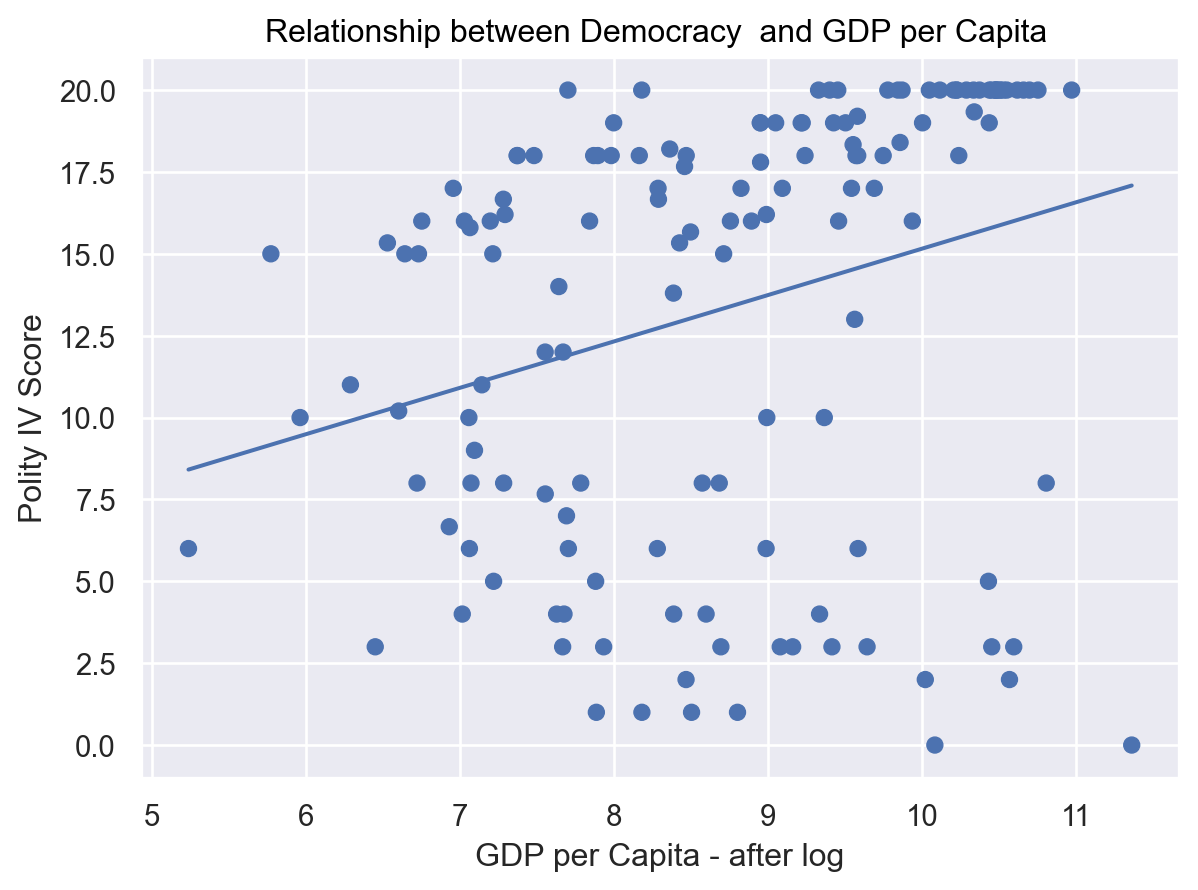

In [75]:
wdi["log_gdppcap08"] = np.log(wdi["gdppcap08"])

so.Plot(wdi, x="log_gdppcap08", y="polityIV").add(so.Dot()).label(
    title="Relationship between Democracy  and GDP per Capita ",
    x="GDP per Capita - after log",
    y="Polity IV Score",
).add(so.Line(), so.PolyFit(1))

### Exercise 8

Once you've applied that transformation, let's re-fit our model. 

Has you sense of the relationship changed at all?

In [76]:
results_log = smf.ols('polityIV ~ gdppcap08', data=wdi).fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00915
Time:                        10:38:46   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

It can be seen that the graph shifts slightly toward the center and provides a better fit to the data than before. The log transformation makes the relationship appear more linear, though the model remains somewhat affected by outliers.


### Exercise 9

When unsure of the most appropriate functional form for a model, it can be useful to fit a *non-parametric* model — one that does not impose a functional form as strictly. 

Fit a lowess regression with confidence intervals using the `seaborn_objects_recipes` package.

`frac` is a keyword that manages how much lowess will smooth it's estimates across the data — higher values will be more smoothed, lower values with fit the data much tighter. Play with the values till you find something you think feels informative.

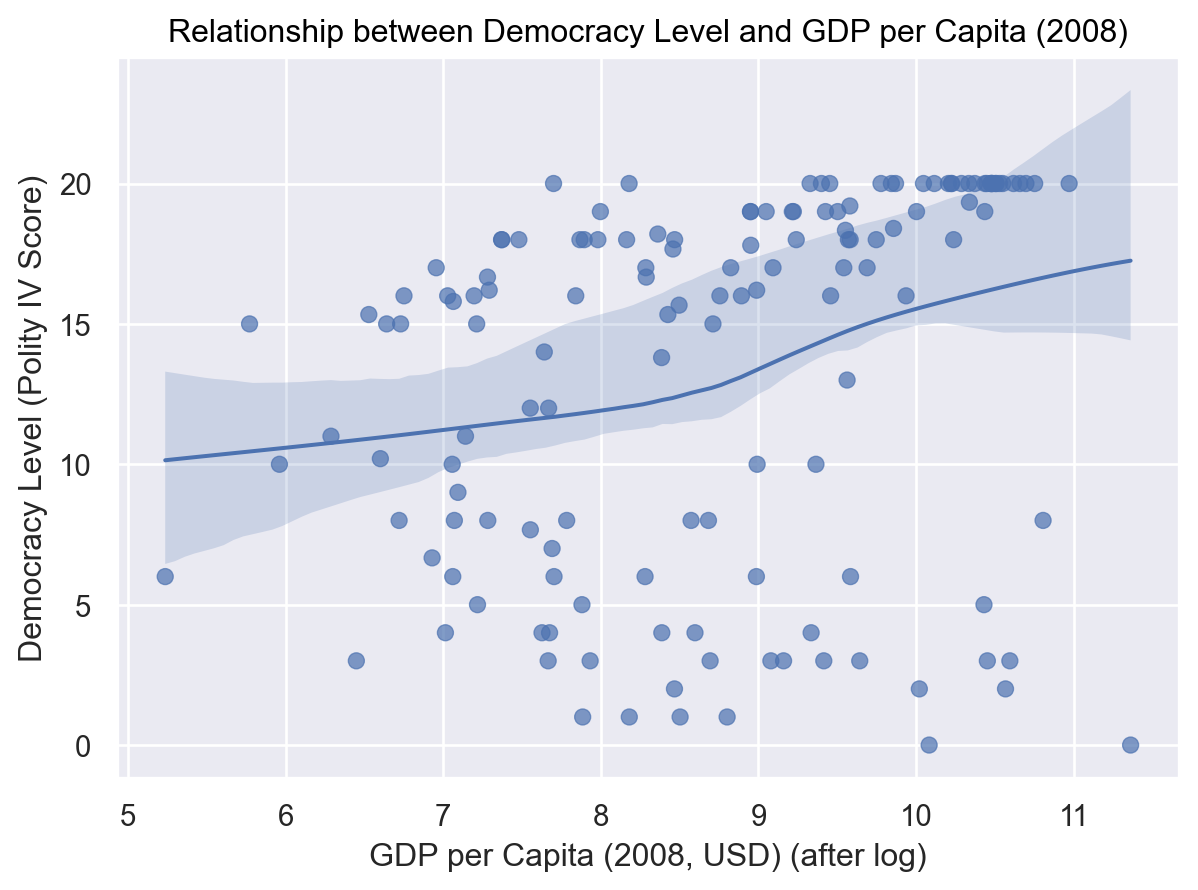

In [77]:
plot = (
    so.Plot(
        wdi.dropna(subset=["log_gdppcap08", "polityIV"]),
        x="log_gdppcap08",
        y="polityIV",
    )
    .add(so.Dot(alpha=0.7))
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.8, num_bootstrap=200, gridsize=100, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .label(
        x="GDP per Capita (2008, USD) (after log)",
        y="Democracy Level (Polity IV Score)",
        title="Relationship between Democracy Level and GDP per Capita (2008)",
    )
)
plot

### Exercise 10

This does seem to fit the data better, but there seem to be quite a few outliers in the bottom right. Who is that? Add text labels to the points on your graph with country names. 

Make sure the size of your text labels leaves them legible. There are enough points you won't be able to perfectly see all labels, but do your best.

You can also add `so.Jitter()` to "jitter" the location of labels (move them randomly so when several points share an exact coordinate, they'll be shifted a little).

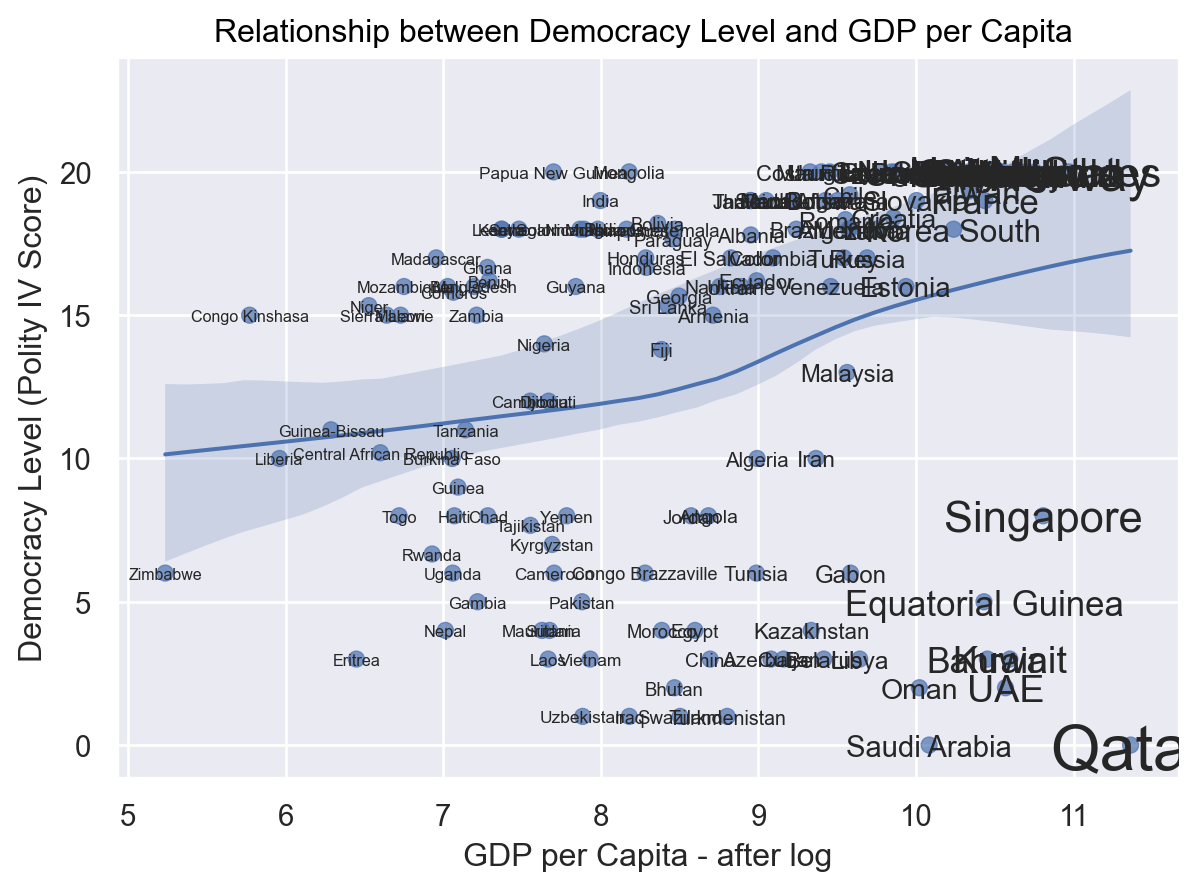

In [78]:
plot = (
    so.Plot(
        wdi.dropna(subset=["log_gdppcap08", "polityIV"]),
        x="log_gdppcap08",
        y="polityIV",
    )
    .add(so.Dot(alpha=0.7), so.Jitter())
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.8, num_bootstrap=100, gridsize=50, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .add(so.Text(), text="country", fontsize="gdppcap08")
    .label(
        x="GDP per Capita - after log",
        y="Democracy Level (Polity IV Score)",
        title="Relationship between Democracy Level and GDP per Capita ",
    )
)
plot

### Exercise 11

Interesting. It seems that there's are a lot of rich, undemocratic countries that all have something in common: they're oil-rich, small, Middle Eastern countries.

Let's see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, and Angola. (Note this was in 2007, and excludes very small countries!) 

What does the relationship between Polity and GDP per capita look like for **non**-natural resource producers?

In [ ]:
oil_countries = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "United Arab Emirates",
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

wdi_no_oil = wdi[~wdi["country"].isin(oil_countries)].dropna(
    subset=["log_gdppcap08", "polityIV"]
)

plot = (
    so.Plot(
        wdi_no_oil,
        x="log_gdppcap08",
        y="polityIV",
    )
    .add(so.Dot(alpha=0.7), so.Jitter())
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.8, num_bootstrap=200, gridsize=100, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .add(so.Text(), text="country", fontsize="gdppcap08")
    .label(
        x="GDP per Capita-after log",
        y="Democracy Level (Polity IV Score)",
        title="Relationship between Democracy Level and GDP per Capita",
    )
)
plot

### Exercise 12

Let's make sure that you accurately identified all 10 of the oil producers. Write a line of code to count up how many big producers you have identified. If you do not get 10, can you figure out what you did wrong?

In [ ]:
wdi[wdi["country"].isin(oil_countries)].shape[0]


### Exercise 13

How does the relationship between GDP per capita and Polity look for the oil producers we dropped above?

(Note you can't add a confidence interval given there are only 10 observations here, so drop the CIs)

In [ ]:
updated_oil_countries = [
    "Kuwait",
    "Qatar",
    "Equatorial Guinea",
    "UAE",
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

wdi[wdi["country"].isin(updated_oil_countries)].shape[0]

In [ ]:
wdi_with_oil = wdi[wdi["country"].isin(updated_oil_countries)].dropna(
    subset=["log_gdppcap08", "polityIV"]
)

plot = (
    so.Plot(
        wdi_with_oil,
        x="log_gdppcap08",
        y="polityIV",
    )
    .add(so.Dot(alpha=0.7))
    .add(so.Line(), so.PolyFit(1))
    .add(so.Text(), text="country", fontsize="gdppcap08")
    .label(
        x="GDP per Capita (2008, USD) (after log)",
        y="Democracy Level (Polity IV Score)",
        title="Relationship between Democracy Level and GDP per Capita (2008)",
    )
)
plot

### Exercise 12

Look back to your answer for Exercise 2. Do you still believe the result of your linear model? What did you learn from plotting. Write down your answers with your partner. 


At first, the linear regression model from Exercise 2 appeared reasonable. The summary statistics indicated a positive relationship between GDP per capita and democracy score (Polity IV). However, visualizing the data through a scatter plot with a regression line showed that the relationship is far more complex.

### Exercise 13

Finally, let's make a plot that color codes countries by whether they are big oil producers. Include separate linear regression fits for both groups.

In [ ]:
wdi["is_oil_producer"] = wdi["country"].isin(updated_oil_countries)

wdi_clean = wdi.dropna(subset=["log_gdppcap08", "polityIV"])

plot = (
    so.Plot(wdi_clean, x="log_gdppcap08", y="polityIV", color="is_oil_producer")
    .add(so.Dot(alpha=0.7))
    .add(so.Line(), so.PolyFit(1))
    .label(
        x="GDP per Capita (2008, USD) (after log)",
        y="Democracy Level (Polity IV Score)",
        color="Oil Producer",
        title="Democracy vs GDP per Capita",
    )
)
plot

## Take-aways

One of our main jobs as data scientists is to *summarize* data. In fact, its such an obvious part of our jobs we often don't think about it very much. In reality, however, this is one of the most difficult things we do. 

Summarization means taking rich, complex data and trying to tell readers about what is going on in that data using simple statistics. In the process of summarization, therefore, we must necessarily throw away much of the richness of the original data. When done well, this simplification makes data easier to understand, but only if we throw away the *right* data. You can *always* calulate the average value of a variable, or fit a linear model, but whether doing so generates a summary statistic that properly represents the essence of the data being studied depends on the data itself. 

Plotting is one fo the best tools we have as data scientists for evaluating whether we are throwing away the *right* data. As we learned from Part 1 of this exercise, just looking at means and standard deviations can mask tremendous variation. Each of our example datasets looked the same when we examined our summary statistics, but they were all radically different when plotted. 

Similarly, a simple linear model would "tell" us that if GDP per capita increases by \$10,000, we would expect Polity scores to increase by about 1 (i.e. the coefficent on the linear model was 9.602e-05). But when we plot the data, not only can we that the data is definitely *not* linear (and so that slope doesn't really mean anything), but we can also see that oil producing countries seem to defy the overall trend, and so should maybe be studied separately. 

Moreover, we can see that if we just look at oil producers, there is no clear story: some are rich and democratic, while others are rich and autocratic (indeed, [this observation is the foundation of some great research on the political consequences of resource wealth](https://www.jstor.org/stable/41480824)!)

So remember this: tools for summarizing data will always give you an answer, but it's up to you as a data scientist to make sure that the summaries you pass on to other people properly represent the data you're using. And there is perhaps no better way to do this than with plotting!



## Overlaying Data Series with matplotlib

In our last plotting exercises, you were asked to make a paired plot in which different data series were plotted next to one another with a shared x-axis. Presumably that resulted in a figure that looked something like this:

In [ ]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn_objects_recipes as sor
from matplotlib import style
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
nick_theme = {**style.library["seaborn-v0_8-whitegrid"]}
nick_theme.update({"font.sans-serif": ["Fira Sans", "Arial", "sans-serif"]})

pd.set_option("mode.copy_on_write", True)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)

india = wdi[wdi["Country Name"] == "India"]

india = india.rename(
    columns={
        "CO2 emissions (metric tons per capita)": "Metric Tons Per Cap CO2",
        "GDP per capita (constant 2010 US$)": "GDP per capita (US$)",
    }
)
p = (
    so.Plot(
        india,
        x="Year",
    )
    .add(so.Dots())
    .pair(
        y=[
            "Metric Tons Per Cap CO2",
            "GDP per capita (US$)",
        ]
    )
)
p

Often times, however, it's more interesting to directly overlay data series on the same plot to make a figure like this:

![two series overlaid](images/two_series_overlayed.png)

So let's do that here!

### Exercise 14

Using [the data from our last exercise](https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/wdi_plotting.csv) (`exercise_plotting_part1`), let's do something like that!

Making this work will require two new tricks: 

- using the `.twinx()` method from matplotlib, and 
- using the `.on()` method from seaborn.objects.

How? Great question! I'm going to leave it to you to figure that out using the documentation for these methods. But here's a start — you can find the `.on()` [method for seaborn.objects here](https://seaborn.pydata.org/generated/seaborn.objects.Plot.on.html), and the `.twinx()` for matplotlib [method demonstrated here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)

Oh, and you may note use these two variables as your two. :) 

Good luck! 

Also, if you want to, feel free to add any extra bells and whistles as part of your exploration (like a legend, or colored y-axis labels).

In [ ]:
fig, ax1 = plt.subplots()

p1 = (
    so.Plot(india, x="Year", y="Metric Tons Per Cap CO2")
    .add(so.Line(color="tab:blue"))
    .add(so.Dot(color="tab:blue"))
    .label(y="Metric Tons Per Cap CO2")
)
p1.on(ax1).plot()

ax2 = ax1.twinx()

p2 = (
    so.Plot(india, x="Year", y="GDP per capita (US$)")
    .add(so.Line(color="tab:red"))
    .add(so.Dot(color="tab:red"))
    .label(y="GDP per capita (US$)")
)
p2.on(ax2).plot()

ax1.set_xlabel("Year")
ax1.set_title("India: CO₂ per Capita vs GDP per Capita Over Time")
fig.tight_layout()
plt.show()